In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
dset = pd.read_csv("IRIS.csv")

## Pre-processing

In [4]:
dset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
missing_values = dset.isna().sum()
print("Number of missing values:")
print(missing_values)

Number of missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
dset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
species = dset["species"].unique()
species_count = dset["species"].nunique()
print(f"There are {species_count} species")
print(species)

There are 3 species
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Number of samples of each type

In [10]:
print(dset["species"].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Feature Extraction

In [11]:
features = dset.drop(["species"], axis=1)
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Visualization

In [12]:
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder

In [13]:
dset["species_id"] = LabelEncoder().fit_transform(dset["species"])

In [14]:
fig1 = px.bar(dset, x="species", y="petal_width", color ="species_id" ,labels={'x': "Species", 'y': "Petal width"})
fig2 = px.bar(dset, x="species", y="petal_length", color ="species_id" ,labels={'x': "Species", 'y': "Petal length"})
fig3 = px.bar(dset, y="species", x="sepal_width", color ="species_id" ,labels={'x': "Species", 'y': "Sepal width"})
fig4 = px.bar(dset, y="species", x="sepal_length", color ="species_id" ,labels={'x': "Species", 'y': "Sepal length"})

#### Defining sub-plot attributes

In [15]:
subplot_fig = make_subplots(rows=2, cols=2, subplot_titles=('Petal Width by Species', 
                                                            'Petal Length by Species', 
                                                            'Sepal Length by Species', 
                                                            'Sepal Width by Species'))

#### Making subplots

In [16]:
subplot_fig.add_trace(fig1['data'][0], row=1, col=1)
subplot_fig.add_trace(fig2['data'][0], row=1, col=2)
subplot_fig.add_trace(fig3['data'][0], row=2, col=1)
subplot_fig.add_trace(fig4['data'][0], row=2, col=2)

subplot_fig.update_traces(marker_line_width=0)
subplot_fig.show()

In [17]:
import seaborn as sns

<Axes: xlabel='species', ylabel='petal_width'>

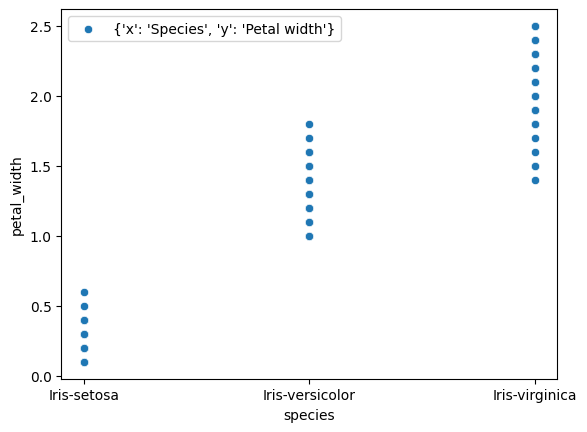

In [18]:
sns.scatterplot(data= dset, x="species", y="petal_width", label={'x': "Species", 'y': "Petal width"})

<Axes: xlabel='species', ylabel='petal_length'>

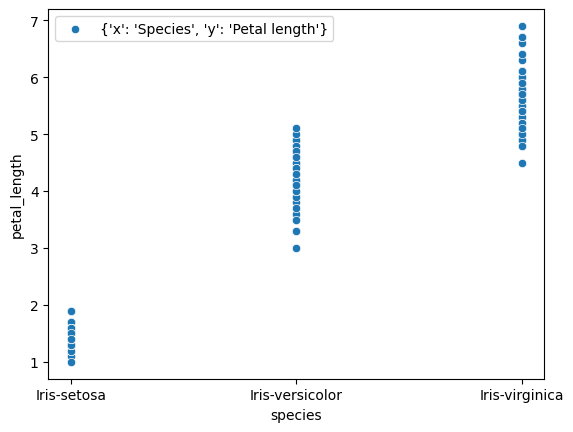

In [19]:
sns.scatterplot(data= dset, x="species", y="petal_length", label={'x': "Species", 'y': "Petal length"})

<Axes: xlabel='species', ylabel='sepal_width'>

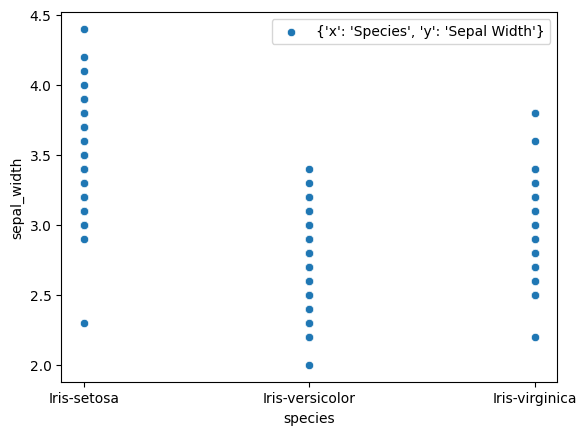

In [20]:
sns.scatterplot(data= dset, x="species", y="sepal_width", label={'x': "Species", 'y': "Sepal Width"})

<Axes: xlabel='species', ylabel='sepal_length'>

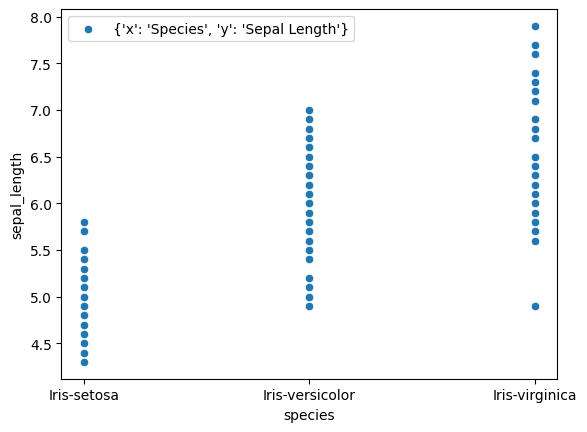

In [21]:
sns.scatterplot(data= dset, x="species", y="sepal_length", label={'x': "Species", 'y': "Sepal Length"})

### Single-variable analysis (univariate analysis)

#### For this let us split the dataset into three groups.

In [22]:
iris_setosa = dset.loc[dset["species"]== "Iris-setosa"]
iris_versicolor = dset.loc[dset["species"]== "Iris-versicolor"]
iris_virginica = dset.loc[dset["species"]== "Iris-virginica"]

Using FacetGrid for plotting multiple categorial values

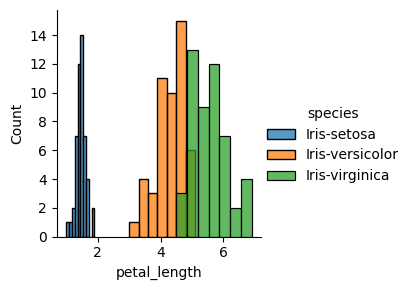

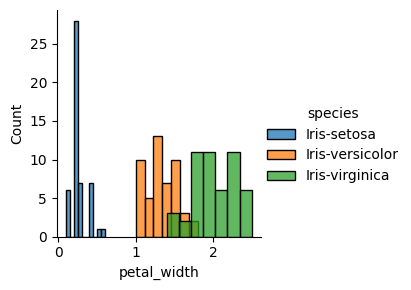

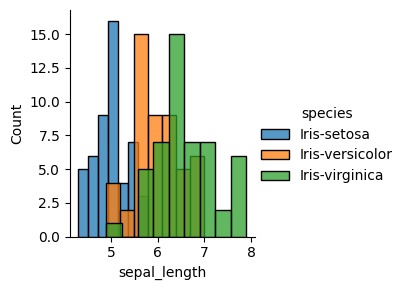

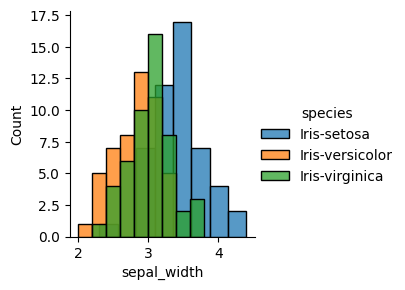

In [23]:
sns.FacetGrid(dset, hue="species").map(sns.histplot, "petal_length").add_legend()
sns.FacetGrid(dset, hue="species").map(sns.histplot, "petal_width").add_legend()
sns.FacetGrid(dset, hue="species").map(sns.histplot, "sepal_length").add_legend()
sns.FacetGrid(dset, hue="species").map(sns.histplot, "sepal_width").add_legend()
plt.show()

In [24]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Petal Length", "Petal Width", "Sepal Length", "Sepal Width"))

# Add box plots to each subplot
fig.add_trace(px.box(dset, x="species", y="petal_length").data[0], row=1, col=1)
fig.add_trace(px.box(dset, x="species", y="petal_width").data[0], row=1, col=2)
fig.add_trace(px.box(dset, x="species", y="sepal_length").data[0], row=2, col=1)
fig.add_trace(px.box(dset, x="species", y="sepal_width").data[0], row=2, col=2)

# Update layout for better presentation
fig.update_layout(
    title_text="Box Plots for Iris Dataset",
    showlegend=True,
    height=800,  # Adjust the height of the entire figure
    width=1200   # Adjust the width of the entire figure
)
fig.show()

In [25]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Petal Length", "Petal Width", "Sepal Length", "Sepal Width"))

# Add box plots to each subplot
fig.add_trace(px.violin(dset, x="species", y="petal_length").data[0], row=1, col=1)
fig.add_trace(px.violin(dset, x="species", y="petal_width").data[0], row=1, col=2)
fig.add_trace(px.violin(dset, x="species", y="sepal_length").data[0], row=2, col=1)
fig.add_trace(px.violin(dset, x="species", y="sepal_width").data[0], row=2, col=2)

# Update layout for better presentation
fig.update_layout(
    title_text="Box Plots for Iris Dataset",
    showlegend=True,
    height=1000,  # Adjust the height of the entire figure
    width=1200   # Adjust the width of the entire figure
)
fig.show()

## Pair Plot

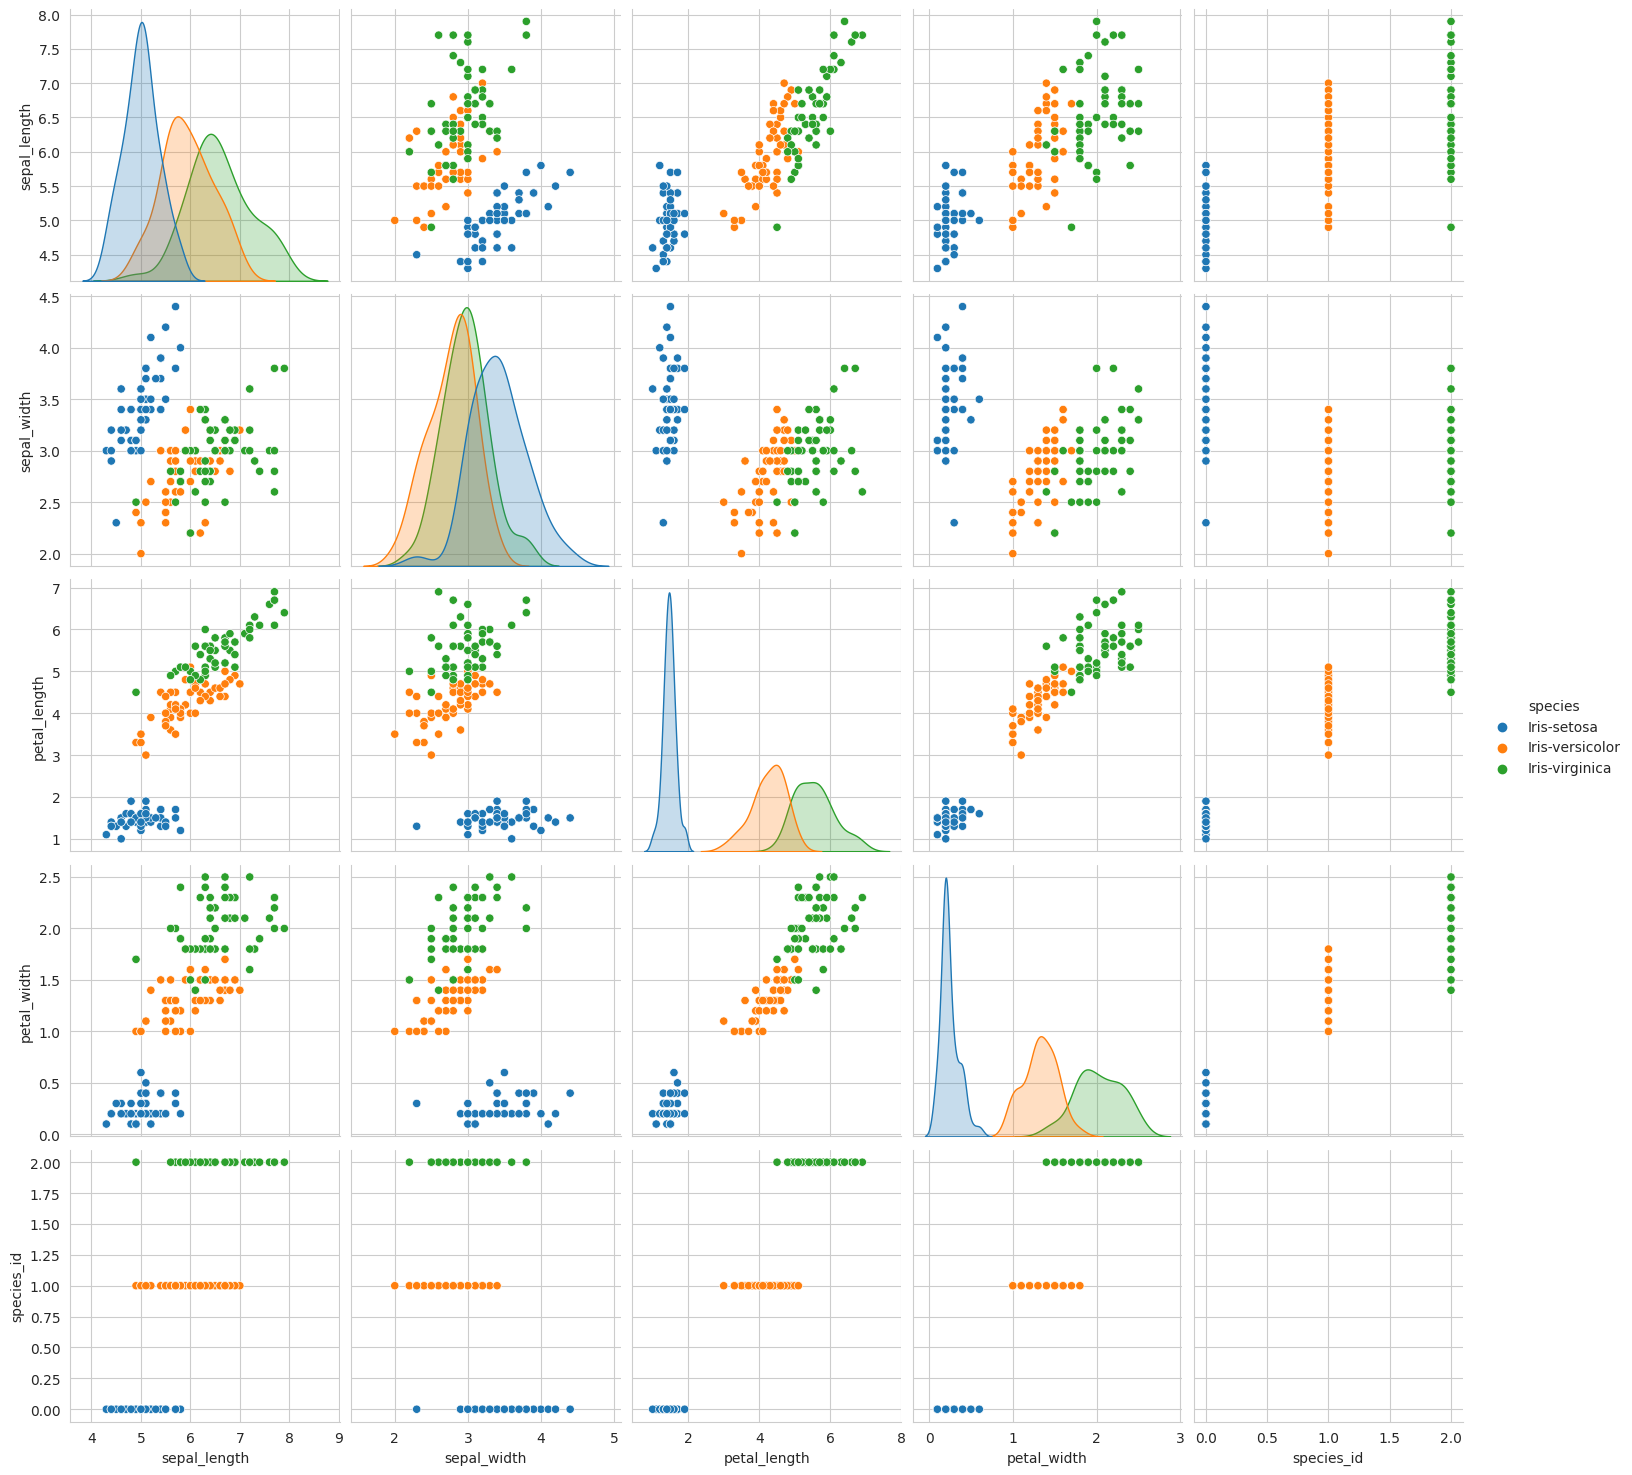

In [26]:
sns.set_style("whitegrid")
sns.pairplot(dset, hue="species", height=3)
plt.show()

## Test and Train

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
label = dset['species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)